In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2

In [3]:
directory_path = '/data/ephemeral/home/data/train/images'
directory = os.listdir(directory_path)

In [4]:
def analyze_folder_names(directory):
    genders = {"female": 0, "male": 0}
    ages_by_10 = {"0-19": 0, "20-29": 0, "30-39": 0, "40-49": 0, "50-59": 0, "60~": 0}
    ages_by_5 = {"0-15": 0, "16-19": 0, "20-25": 0, "26-29": 0, "30-35": 0, "36-39": 0, "40-45": 0, "46-49": 0, "50-55": 0, "56-59": 0, "60~": 0}
    ages_by_3 = {"0-13": 0, "14-16": 0, "17-19": 0, "20-23": 0, "24-26": 0, "27-29": 0, "30-33": 0, "34-36": 0, "37-39": 0, "40-43": 0, "44-46": 0, "47-49": 0, "50-53": 0, "54-56": 0, "57-59": 0, "60~": 0}
    directory_cnt = 0
    
    for folder_name in directory:
        if folder_name.startswith('.'):
            continue
        directory_cnt += 1
        
        parts = folder_name.split('_')
        if len(parts) == 4:
            idx, gender, race, age = parts
            genders[gender] += 1
            
            if age < '20':
                ages_by_10['0-19'] += 1
                if age > '15':
                    ages_by_5['16-19'] += 1
                else:
                    ages_by_5['10-15'] += 1
                if age > '16':
                    ages_by_3['17-19'] += 1
                elif age > '13':
                    ages_by_3['14-16'] += 1
                else:
                    ages_by_3['0-13'] += 1
            elif age < '30':
                ages_by_10['20-29'] += 1
                if age > '25':
                    ages_by_5['26-29'] += 1
                else:
                    ages_by_5['20-25'] += 1
                if age > '26':
                    ages_by_3['27-29'] += 1
                elif age > '23':
                    ages_by_3['24-26'] += 1
                else:
                    ages_by_3['20-23'] += 1
            elif age < '40':
                ages_by_10['30-39'] += 1
                if age > '35':
                    ages_by_5['36-39'] += 1
                else:
                    ages_by_5['30-35'] += 1
                if age > '36':
                    ages_by_3['37-39'] += 1
                elif age > '33':
                    ages_by_3['34-36'] += 1
                else:
                    ages_by_3['30-33'] += 1
            elif age < '50':
                ages_by_10['40-49'] += 1
                if age > '45':
                    ages_by_5['46-49'] += 1
                else:
                    ages_by_5['40-45'] += 1
                if age > '46':
                    ages_by_3['47-49'] += 1
                elif age > '43':
                    ages_by_3['44-46'] += 1
                else:
                    ages_by_3['40-43'] += 1
            elif age < '60':
                ages_by_10['50-59'] += 1
                if age > '55':
                    ages_by_5['56-59'] += 1
                else:
                    ages_by_5['50-55'] += 1
                if age > '56':
                    ages_by_3['57-59'] += 1
                elif age > '53':
                    ages_by_3['54-56'] += 1
                else:
                    ages_by_3['50-53'] += 1
            else:
                ages_by_10['60~'] += 1
                ages_by_5['60~'] += 1
                ages_by_3['60~'] += 1

    print("directory count: ", directory_cnt)
    
    return genders, ages_by_10, ages_by_5, ages_by_3

In [5]:
gender_distribution, age_distribution_by_10, age_distribution_by_5 ,age_distribution_by_3 = analyze_folder_names(directory)

age_groups_by_10 = list(age_distribution_by_10.keys())
age_counts_by_10 = list(age_distribution_by_10.values())

age_groups_by_5 = list(age_distribution_by_5.keys())
age_counts_by_5 = list(age_distribution_by_5.values())

age_groups_by_3 = list(age_distribution_by_3.keys())
age_counts_by_3 = list(age_distribution_by_3.values())

gender_groups = list(gender_distribution.keys())
gender_counts = list(gender_distribution.values())

directory count:  2700


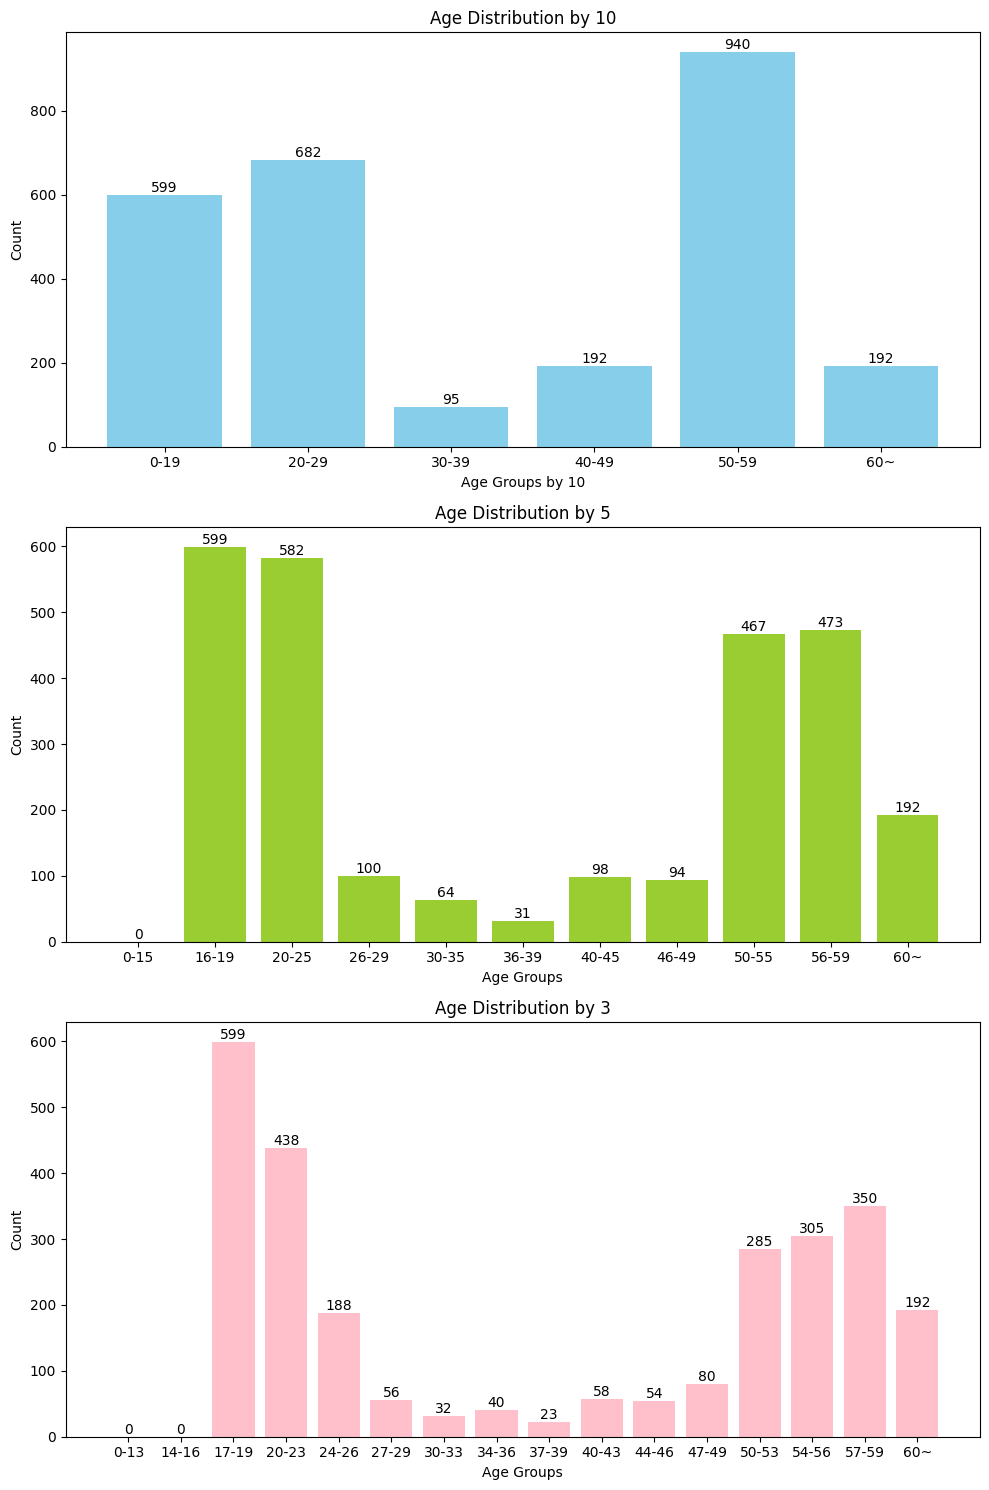

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

axes[0].bar(age_groups_by_10, age_counts_by_10, color='skyblue')
axes[0].set_title('Age Distribution by 10')
axes[0].set_xlabel('Age Groups by 10')
axes[0].set_ylabel('Count')

axes[1].bar(age_groups_by_5, age_counts_by_5, color='yellowgreen')
axes[1].set_title('Age Distribution by 5')
axes[1].set_xlabel('Age Groups')
axes[1].set_ylabel('Count')

axes[2].bar(age_groups_by_3, age_counts_by_3, color='pink')
axes[2].set_title('Age Distribution by 3')
axes[2].set_xlabel('Age Groups')
axes[2].set_ylabel('Count')

for i in range(len(age_groups_by_10)):
    axes[0].text(i, age_counts_by_10[i], age_counts_by_10[i], ha='center', va='bottom')

for i in range(len(age_groups_by_5)):
    axes[1].text(i, age_counts_by_5[i], age_counts_by_5[i], ha='center', va='bottom')

for i in range(len(age_groups_by_3)):
    axes[2].text(i, age_counts_by_3[i], age_counts_by_3[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()

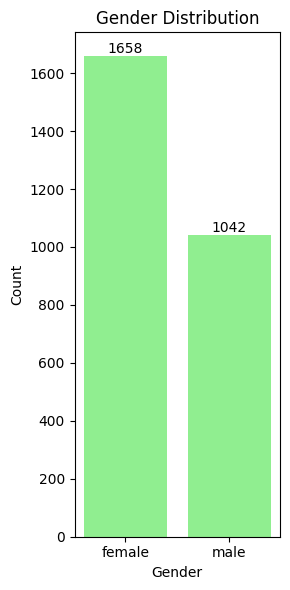

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3, 6))

axes.bar(gender_groups, gender_counts, color='lightgreen')
axes.set_title('Gender Distribution')
axes.set_xlabel('Gender')
axes.set_ylabel('Count')

for i, count in enumerate(gender_counts):
    axes.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [8]:
csv_dir = "../../data/train/"
data_s = pd.read_csv(os.path.join(csv_dir, "train.csv"))

In [9]:
map_gender = {'male':0, 'female':1}
data_s['gender_label'] = data_s['gender'].map(map_gender.get)

def from_number(value: int):
    if value < 30:
        return 0
    elif value < 60:
        return 1
    else:
        return 2
data_s['age_label'] = data_s['age'].map(from_number)
data_s['class'] = data_s['gender_label'] * 3 + data_s['age_label']

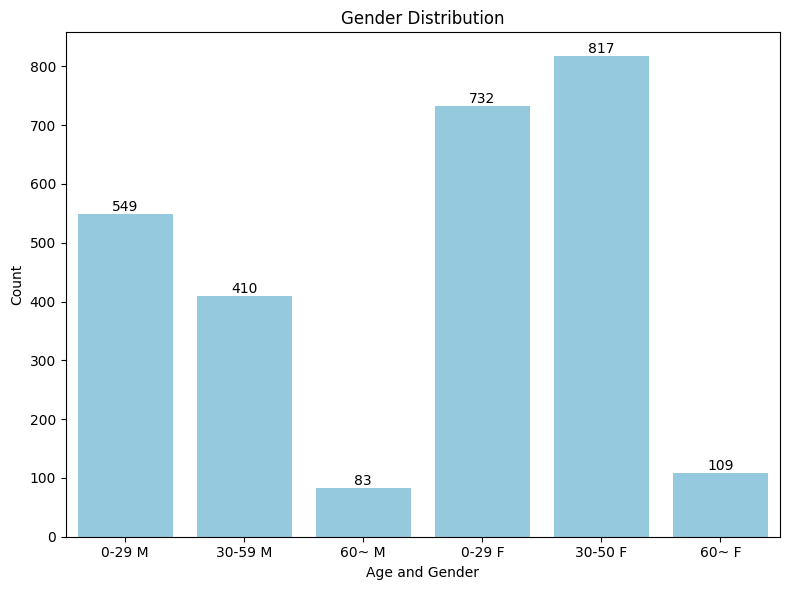

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
cls_cnt = data_s.groupby("class").count()

cls = sns.barplot(data=cls_cnt, x='class', y='gender', color='skyblue')
cls.set_title('Gender Distribution')
cls.set_xlabel('Age and Gender')
cls.set_ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5], ['0-29 M', '30-59 M', '60~ M',
                                '0-29 F', '30-50 F', '60~ F'])

for p in cls.patches:
    cls.text(p.get_x() + p.get_width() / 2, # x 좌표
            p.get_y() + p.get_height() , # y 좌표
            f"{p.get_height():.0f}", # 값
            ha='center',
            va='bottom') # 가운데 정렬

plt.tight_layout()
plt.show()

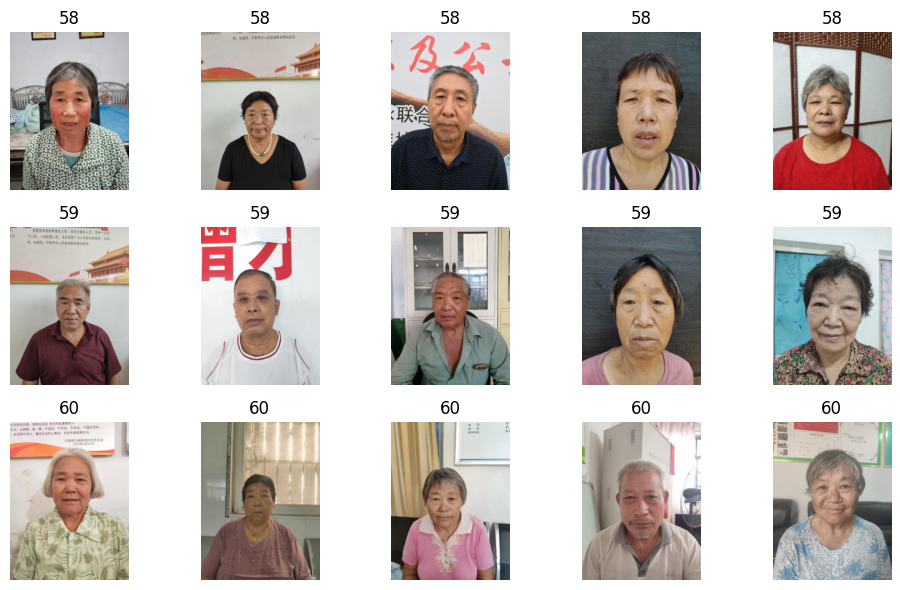

In [11]:
ex_58 = []
ex_59 = []
ex_60 = []
s_age58 = data_s.loc[data_s['age'] == 58, :]
samples_58 = s_age58.sample(5)
samples_58_n = list(samples_58.index)

s_age59 = data_s.loc[data_s['age'] == 59, :]
samples_59 = s_age59.sample(5)
samples_59_n = list(samples_59.index)

s_age60 = data_s.loc[data_s['age'] == 60, :]
samples_60 = s_age60.sample(5)
samples_60_n = list(samples_60.index)

for i in range(5):
    img58_dir = directory_path + '/' + data_s['path'][samples_58_n[i]]
    img59_dir = directory_path + '/' + data_s['path'][samples_59_n[i]]
    img60_dir = directory_path + '/' + data_s['path'][samples_60_n[i]]

    img58_path = os.path.join(img58_dir, 'normal.jpg')
    img59_path = os.path.join(img59_dir, 'normal.jpg')
    img60_path = os.path.join(img60_dir, 'normal.jpg')

    ex_58.append(cv2.imread(img58_path))
    ex_59.append(cv2.imread(img59_path))
    ex_60.append(cv2.imread(img60_path))

    ex_58[-1] = cv2.cvtColor(ex_58[i], cv2.COLOR_BGR2RGB) # RGB 채널
    ex_59[-1] = cv2.cvtColor(ex_59[i], cv2.COLOR_BGR2RGB) # RGB 채널
    ex_60[-1] = cv2.cvtColor(ex_60[i], cv2.COLOR_BGR2RGB) # RGB 채널

fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for j in range(5):
    ax[0][j].axis('off')
    ax[1][j].axis('off')
    ax[2][j].axis('off')

    ax[0][j].imshow(ex_58[j])
    ax[1][j].imshow(ex_59[j])
    ax[2][j].imshow(ex_60[j])

    ax[0][j].set_title('58')
    ax[1][j].set_title('59')
    ax[2][j].set_title('60')
plt.tight_layout()
plt.show()

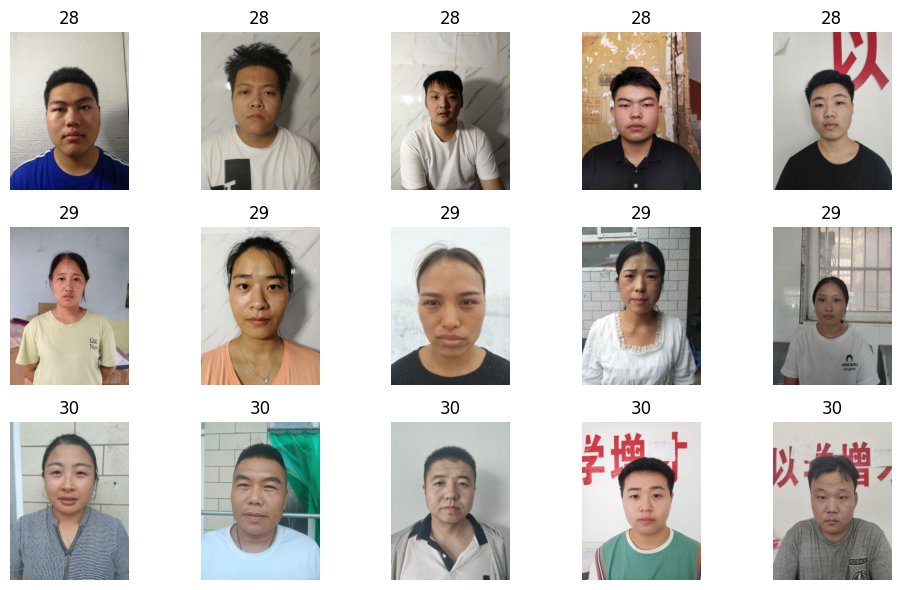

In [12]:
ex_28 = []
ex_29 = []
ex_30 = []

s_age28 = data_s.loc[data_s['age'] == 28, :]
samples_28 = s_age28.sample(5)
samples_28_n = list(samples_28.index)

s_age29 = data_s.loc[data_s['age'] == 29, :]
samples_29 = s_age29.sample(5)
samples_29_n = list(samples_29.index)

s_age30 = data_s.loc[data_s['age'] == 30, :]
samples_30 = s_age30.sample(5)
samples_30_n = list(samples_30.index)

for i in range(5):
    img28_dir = directory_path + '/' + data_s['path'][samples_28_n[i]]
    img29_dir = directory_path + '/' + data_s['path'][samples_29_n[i]]
    img30_dir = directory_path + '/' + data_s['path'][samples_30_n[i]]

    img28_path = os.path.join(img28_dir, 'normal.jpg')
    img29_path = os.path.join(img29_dir, 'normal.jpg')
    img30_path = os.path.join(img30_dir, 'normal.jpg')

    ex_28.append(cv2.imread(img28_path))
    ex_29.append(cv2.imread(img29_path))
    ex_30.append(cv2.imread(img30_path))

    ex_28[-1] = cv2.cvtColor(ex_28[i], cv2.COLOR_BGR2RGB) # RGB 채널
    ex_29[-1] = cv2.cvtColor(ex_29[i], cv2.COLOR_BGR2RGB) # RGB 채널
    ex_30[-1] = cv2.cvtColor(ex_30[i], cv2.COLOR_BGR2RGB) # RGB 채널

fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for j in range(5):
    ax[0][j].axis('off')
    ax[1][j].axis('off')
    ax[2][j].axis('off')

    ax[0][j].imshow(ex_28[j])
    ax[1][j].imshow(ex_29[j])
    ax[2][j].imshow(ex_30[j])

    ax[0][j].set_title('28')
    ax[1][j].set_title('29')
    ax[2][j].set_title('30')

plt.tight_layout()
plt.show()